In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# 데이터 로드
df = pd.read_csv("C:/Users/tisxo/Downloads/titanic.csv")


In [2]:
# 데이터 확인
df
print("컬럼 확인:", df.columns)

컬럼 확인: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
# 결측치 확인
print("결측치 확인 (제거 전):")
print(df.isnull().sum())

결측치 확인 (제거 전):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# 결측치 처리
#   - age 컬럼의 평균값 계산 (결측치를 제외한 값으로 계산)
mean_age = df['Age'].mean()
#   - age 컬럼의 결측치를 평균값으로 채우기
df['Age'] = df['Age'].fillna(mean_age)
#   - 나머지 결측치는 제거
df = df.dropna()

In [9]:
print("결측치 확인 (제거 후):")
print(df.isnull().sum())

결측치 확인 (제거 후):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
# 레이블 확인 (imbalanced data)
print(df['Survived'].value_counts())

Survived
1    134
0     68
Name: count, dtype: int64


Text(0.5, 1.0, 'Label Distribution')

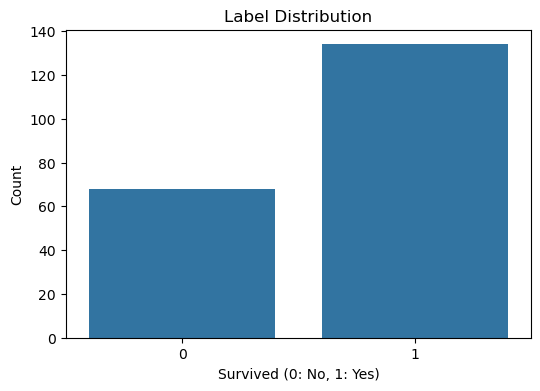

In [13]:
# 레이블 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')  # survived 레이블 분포
plt.xlabel("Survived (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Label Distribution")

In [15]:
# 삭제할 컬럼 리스트
columns_to_delete = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare']

In [17]:
# 특정 컬럼만 삭제
df = df.drop(columns=columns_to_delete)

In [19]:
# 삭제후 컬럼 확인
print("컬럼 확인:", df.columns)

컬럼 확인: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [27]:
# 레이블 확인 (imbalanced data) - 변환 전
print("Sex 레이블 분포 (변환 전):")
print(df['Sex'].value_counts())
print(df['Sex'].unique()) 

Sex 레이블 분포 (변환 전):
Sex
male      107
female     95
Name: count, dtype: int64
['female' 'male']


In [29]:
# 특정 컬럼만 인코딩
label_encoder = LabelEncoder()
columns_to_encode = ['Sex']  # 인코딩할 컬럼 리스트

for column in columns_to_encode:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch
1           1       1    0  38.0      1      0
3           1       1    0  35.0      1      0
6           0       1    1  54.0      0      0
10          1       3    0   4.0      1      1
11          1       1    0  58.0      0      0
..        ...     ...  ...   ...    ...    ...
871         1       1    0  47.0      1      1
872         0       1    1  33.0      0      0
879         1       1    0  56.0      0      1
887         1       1    0  19.0      0      0
889         1       1    1  26.0      0      0

[202 rows x 6 columns]


In [31]:
# 레이블 확인 (imbalanced data) - 변환 후
print("Sex 레이블 분포 (변환 후):")
print(df['Sex'].value_counts())
print(df['Sex'].unique()) 

Sex 레이블 분포 (변환 후):
Sex
1    107
0     95
Name: count, dtype: int64
[0 1]


In [49]:
# 데이터 분할
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# SVM
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8048780487804879
[[ 1  7]
 [ 1 32]]


In [53]:
# LR
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8048780487804879
[[ 4  4]
 [ 4 29]]


In [57]:
#DT
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8780487804878049
[[ 7  1]
 [ 4 29]]


In [59]:
# RF
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8536585365853658
[[ 7  1]
 [ 5 28]]


In [63]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)

print("\n--- K-Nearest Neighbors Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- K-Nearest Neighbors Classifier ---
0.8780487804878049
[[ 6  2]
 [ 3 30]]
